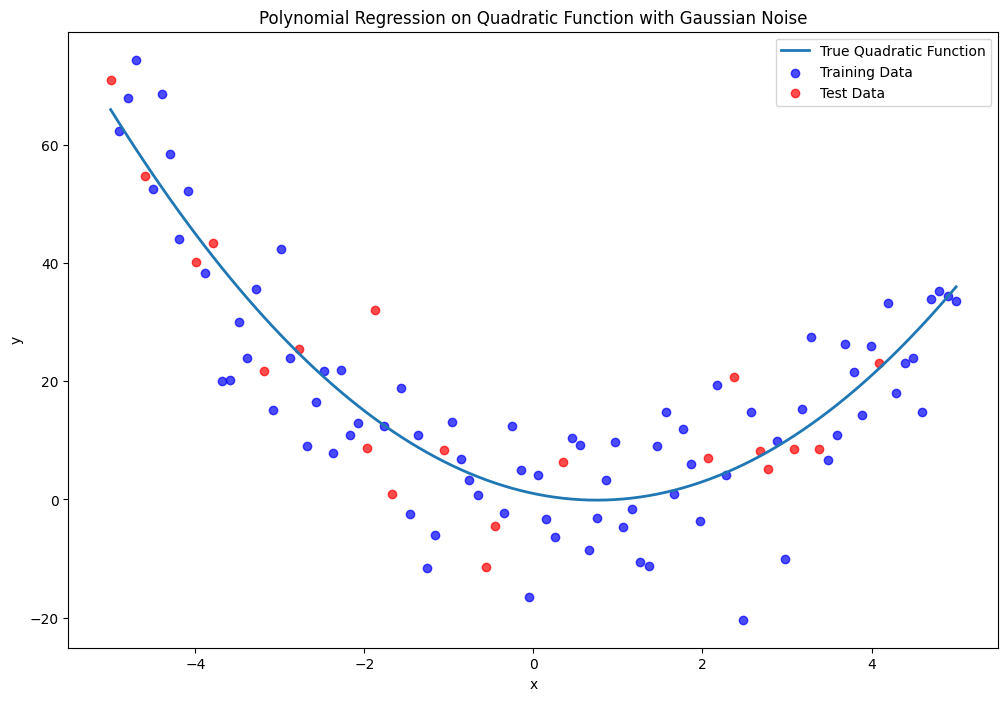

Root Mean Squared Error (RMSE) on the test dataset: 9.04


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate data
num_points = 100
x = np.linspace(-5, 5, num_points)
true_coefficients = [2, -3, 1]  # Coefficients for a second-order polynomial (ax^2 + bx + c)
y_true = np.polyval(true_coefficients, x)

# Add Gaussian noise to the data
noise_level = 10
y_noisy = y_true + np.random.normal(0, noise_level, size=num_points)

# Segregate data into training and test sets
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=test_size, random_state=42)

# Model the data using a tenth-order polynomial with Linear Regression (basis functions approach)
degree = 10
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x_train.reshape(-1, 1), y_train)

# Predictions on the test set
y_pred = model.predict(x_test.reshape(-1, 1))

# Compute Root Mean Squared Error (RMSE) on the test dataset
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot the true quadratic function, training and test data, and regression curve
plt.figure(figsize=(12, 8))
plt.plot(x, y_true, label='True Quadratic Function', linewidth=2)
plt.scatter(x_train, y_train, color='blue', label='Training Data', alpha=0.7)
plt.scatter(x_test, y_test, color='red', label='Test Data', alpha=0.7)
# plt.plot(x_test, y_pred, label=f'10th-order Polynomial Regression (RMSE={rmse:.2f})', linestyle='--', linewidth=2)
plt.title('Polynomial Regression on Quadratic Function with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print(f"Root Mean Squared Error (RMSE) on the test dataset: {rmse:.2f}")


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)

# Generate data
num_points = 100
x = np.linspace(-5, 5, num_points)
true_coefficients = [2, -3, 1]  # Coefficients for a second-order polynomial (ax^2 + bx + c)
y_true = np.polyval(true_coefficients, x)

# Add Gaussian noise to the data
noise_level = 10
y_noisy = y_true + np.random.normal(0, noise_level, size=num_points)

# Plot the true quadratic function and the noisy data
# plt.figure(figsize=(8, 6))
# plt.plot(x, y_true, label='True Quadratic Function', linewidth=2)
# plt.scatter(x, y_noisy, color='red', label='Noisy Data (Gaussian)')
# plt.title('Artificial Data from Second-Order Polynomial with Gaussian Noise')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend()
# plt.show()
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=test_size, random_state=42)
degree = 10
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

# Train linear regression model on polynomial features
model = LinearRegression()
model.fit(x_poly, y_noisy)

LinearRegression()

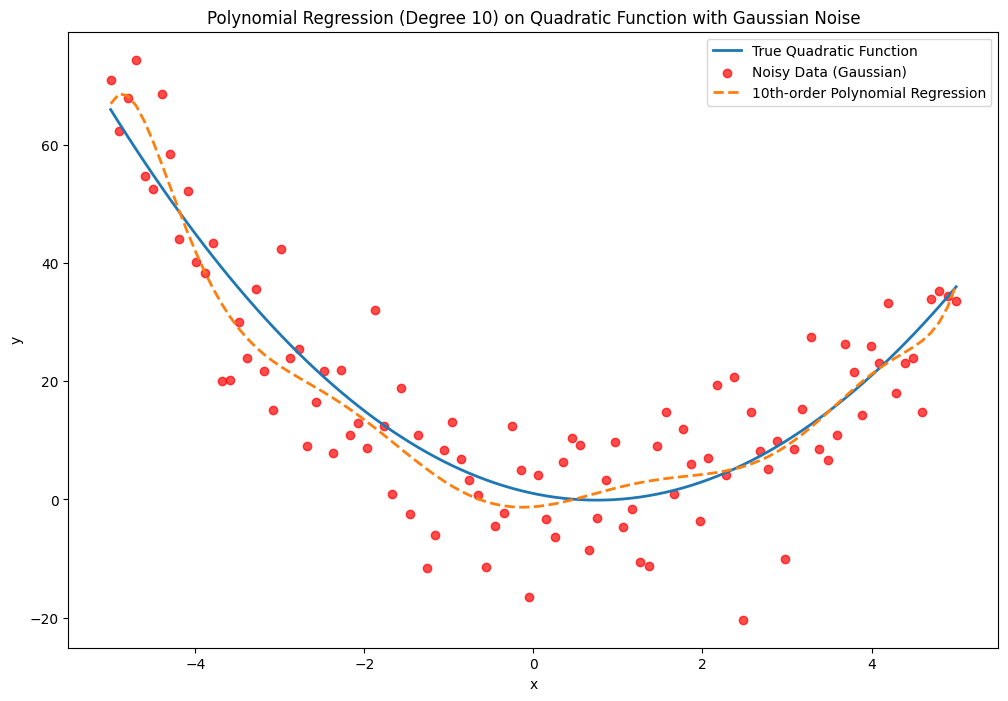

Root Mean Squared Error (RMSE): 8.55


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Set seed for reproducibility
np.random.seed(42)

# Generate data
num_points = 100
x = np.linspace(-5, 5, num_points)
true_coefficients = [2, -3, 1]  # Coefficients for a second-order polynomial (ax^2 + bx + c)
y_true = np.polyval(true_coefficients, x)

# Add Gaussian noise to the data
noise_level = 10
y_noisy = y_true + np.random.normal(0, noise_level, size=num_points)

test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=test_size, random_state=42)
# Create polynomial features up to the tenth order
degree = 10
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

# Train linear regression model on polynomial features
model = LinearRegression()
model.fit(x_poly, y_noisy)

# Generate predictions on the original x values
y_pred = model.predict(poly_features.transform(x.reshape(-1, 1)))

# Plot the true quadratic function, training and test data, and regression curve
plt.figure(figsize=(12, 8))
plt.plot(x, y_true, label='True Quadratic Function', linewidth=2)
plt.scatter(x, y_noisy, color='red', label='Noisy Data (Gaussian)', alpha=0.7)
plt.plot(x, y_pred, label=f'{degree}th-order Polynomial Regression', linestyle='--', linewidth=2)
plt.title(f'Polynomial Regression (Degree {degree}) on Quadratic Function with Gaussian Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Compute Root Mean Squared Error (RMSE) on the test dataset
rmse = np.sqrt(mean_squared_error(y_noisy, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")